In [67]:
import numpy as np
import pandas as pd
import wave
import math
import matplotlib.pyplot as plt

import config

from data import load_sample_data, load_event_data, downsample, get_time_interval
from data_merge import merge_samples_events
from data_transform import get_event_sequences

In [68]:

FILE_PATH = "../data/DoubleBlinkLR_Alex"

DOWNSAMPLE_RATE = 100

EVENT_LENGTH = 3 # length of a given event sequence in seconds

EVENT_START = -0.25
EVENT_END = 0.25


In [69]:
samples_df = load_sample_data(FILE_PATH)
samples_df = downsample(samples_df, n=DOWNSAMPLE_RATE)
events_df = load_event_data(FILE_PATH)

merge_df = merge_samples_events(samples_df, events_df, EVENT_START, EVENT_END)

# time_start = 30
# time_end = 60
# merge_df = get_time_interval(merge_df, time_start, time_end)
# print(merge_df)

seq_data, seq_labels = get_event_sequences(merge_df, event_length=EVENT_LENGTH)

print(seq_data.shape, seq_data)
print(seq_labels.shape, seq_labels)




Sample rate: 10000 samples/sec
Sample size: 2 bytes
No. channels: 1
Transforming data into individual sequences...
Transformed 18482 sequences of size 300
(18482, 300) [[ -105.98   129.44   -33.44 ...   176.29   155.79    61.92]
 [  129.44   -33.44   116.55 ...   155.79    61.92    76.39]
 [  -33.44   116.55  -125.85 ...    61.92    76.39    -7.94]
 ...
 [ -335.87   -44.54  -233.16 ... -2223.95 -1982.8  -1222.54]
 [  -44.54  -233.16   -38.21 ... -1982.8  -1222.54 -1108.52]
 [ -233.16   -38.21  -286.27 ... -1222.54 -1108.52  -457.56]]
(18482,) [-1 -1 -1 ... -1 -1 -1]


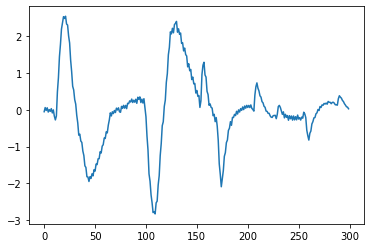

In [70]:
# Transform sequence data

for i in range(len(seq_data)):
    seq_data[i] /= seq_data[i].std()


plt.plot(seq_data[0])

[0 0 0 ... 0 0 0]
18482
0 14782 0.7998052158857266
1 1900 0.10280272697759983
2 1800 0.09739205713667352


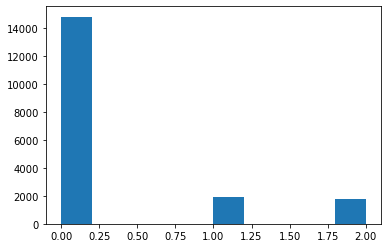

In [71]:
# Transform sequence labels

# 0 for None, 1 for Left, 2 for Right
seq_labels[seq_labels == -1] = 0
print(seq_labels)

plt.hist(seq_labels)

print(len(seq_labels))
print(0, sum(seq_labels == 0), sum(seq_labels == 0)/len(seq_labels))
print(1, sum(seq_labels == 1), sum(seq_labels == 1)/len(seq_labels))
print(2, sum(seq_labels == 2), sum(seq_labels == 2)/len(seq_labels))


In [111]:
# Randomly arrange data
# Be careful with this (best to test never-before-seen entire events rather than sequences)

train_n = round(len(seq_data)*0.7)
test_n = len(seq_data) - train_n
print(train_n, test_n)

train_seq, test_seq = seq_data[:train_n], seq_data[train_n:]
train_labels, test_labels = seq_labels[:train_n], seq_labels[train_n:]

print(train_seq.shape, train_labels.shape, train_labels)
print(test_seq.shape, test_labels.shape, test_labels)

# Print some labels examples
# for i in range(100, len(test_labels), 500):
#     print(i, test_labels[i])

12937 5545
(12937, 300) (12937,) [0 0 0 ... 0 0 0]
(5545, 300) (5545,) [0 0 0 ... 0 0 0]


In [98]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.8, input_shape=(300,)),
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
#     tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),
    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 300)               0         
                                                                 
 dropout_14 (Dropout)        (None, 300)               0         
                                                                 
 dense_33 (Dense)            (None, 16)                4816      
                                                                 
 dense_34 (Dense)            (None, 3)                 51        
                                                                 
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________


In [124]:
import tensorflow as tf

# 85-86% after ~50 epochs
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.9, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 300)               0         
                                                                 
 dropout_20 (Dropout)        (None, 300)               0         
                                                                 
 dense_46 (Dense)            (None, 32)                9632      
                                                                 
 dense_47 (Dense)            (None, 16)                528       
                                                                 
 dense_48 (Dense)            (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [130]:
import tensorflow as tf

# 1000 epochs 86-87% accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.95, input_shape=(300,)),
    
    tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(16, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_21 (Flatten)        (None, 300)               0         
                                                                 
 dropout_22 (Dropout)        (None, 300)               0         
                                                                 
 dense_52 (Dense)            (None, 32)                9632      
                                                                 
 dense_53 (Dense)            (None, 16)                528       
                                                                 
 dense_54 (Dense)            (None, 3)                 51        
                                                                 
Total params: 10,211
Trainable params: 10,211
Non-trainable params: 0
_________________________________________________________________


In [143]:
import tensorflow as tf

#
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dropout(.95, input_shape=(300,)),
    
    tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(.2, input_shape=(16,)),

    tf.keras.layers.Dense(32, activation='relu'),

    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 300)               0         
                                                                 
 dropout_26 (Dropout)        (None, 300)               0         
                                                                 
 dense_65 (Dense)            (None, 64)                19264     
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dense_67 (Dense)            (None, 3)                 99        
                                                                 
Total params: 21,443
Trainable params: 21,443
Non-trainable params: 0
_________________________________________________________________


In [144]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

EPOCHS = 1000

history = model.fit(
    train_seq,
    train_labels,
    epochs=EPOCHS,
    validation_data=(test_seq, test_labels)
#     batch_size=16
)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.8450 - accuracy: 0.7557 - val_loss: 0.7651 - val_accuracy: 0.8088
Epoch 2/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.7915 - val_loss: 0.6973 - val_accuracy: 0.8088
Epoch 3/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.7969 - val_loss: 0.6651 - val_accuracy: 0.8175
Epoch 4/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.7988 - val_loss: 0.6195 - val_accuracy: 0.8166
Epoch 5/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5970 - accuracy: 0.7989 - val_loss: 0.6040 - val_accuracy: 0.8124
Epoch 6/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5860 - accuracy: 0.8000 - val_loss: 0.5668 - val_accuracy: 0.8023
Epoch 7/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.8000 - val_loss: 0.5634 - val_accuracy:

405/405 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.8146 - val_loss: 0.4319 - val_accuracy: 0.8382
Epoch 58/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.5122 - accuracy: 0.8123 - val_loss: 0.4226 - val_accuracy: 0.8442
Epoch 59/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.8156 - val_loss: 0.4284 - val_accuracy: 0.8339
Epoch 60/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4949 - accuracy: 0.8145 - val_loss: 0.4256 - val_accuracy: 0.8435
Epoch 61/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.4957 - accuracy: 0.8134 - val_loss: 0.4252 - val_accuracy: 0.8384
Epoch 62/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4955 - accuracy: 0.8145 - val_loss: 0.4205 - val_accuracy: 0.8409
Epoch 63/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4986 - accuracy: 0.8145 - val_loss: 0.4209 - val_accuracy: 0.8381

405/405 [==============================] - 0s 1ms/step - loss: 0.4808 - accuracy: 0.8153 - val_loss: 0.4143 - val_accuracy: 0.8319
Epoch 114/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4842 - accuracy: 0.8170 - val_loss: 0.4253 - val_accuracy: 0.8283
Epoch 115/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.8178 - val_loss: 0.4136 - val_accuracy: 0.8370
Epoch 116/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.8217 - val_loss: 0.4129 - val_accuracy: 0.8413
Epoch 117/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.8203 - val_loss: 0.4074 - val_accuracy: 0.8368
Epoch 118/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.8180 - val_loss: 0.4072 - val_accuracy: 0.8364
Epoch 119/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8264 - val_loss: 0.4149 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.8204 - val_loss: 0.4027 - val_accuracy: 0.8463
Epoch 170/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8214 - val_loss: 0.4021 - val_accuracy: 0.8453
Epoch 171/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.8214 - val_loss: 0.4112 - val_accuracy: 0.8442
Epoch 172/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.8225 - val_loss: 0.3991 - val_accuracy: 0.8390
Epoch 173/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8256 - val_loss: 0.3995 - val_accuracy: 0.8445
Epoch 174/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4642 - accuracy: 0.8235 - val_loss: 0.4064 - val_accuracy: 0.8424
Epoch 175/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.8224 - val_loss: 0.3980 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4633 - accuracy: 0.8232 - val_loss: 0.3979 - val_accuracy: 0.8566
Epoch 226/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4614 - accuracy: 0.8224 - val_loss: 0.4015 - val_accuracy: 0.8445
Epoch 227/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8241 - val_loss: 0.3910 - val_accuracy: 0.8512
Epoch 228/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8273 - val_loss: 0.3897 - val_accuracy: 0.8447
Epoch 229/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4626 - accuracy: 0.8264 - val_loss: 0.3908 - val_accuracy: 0.8435
Epoch 230/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8228 - val_loss: 0.3799 - val_accuracy: 0.8559
Epoch 231/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.8279 - val_loss: 0.3842 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4530 - accuracy: 0.8275 - val_loss: 0.3860 - val_accuracy: 0.8530
Epoch 282/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8254 - val_loss: 0.3949 - val_accuracy: 0.8516
Epoch 283/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8279 - val_loss: 0.3803 - val_accuracy: 0.8595
Epoch 284/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4576 - accuracy: 0.8251 - val_loss: 0.3956 - val_accuracy: 0.8478
Epoch 285/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4545 - accuracy: 0.8239 - val_loss: 0.3774 - val_accuracy: 0.8536
Epoch 286/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4524 - accuracy: 0.8284 - val_loss: 0.3955 - val_accuracy: 0.8469
Epoch 287/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.8245 - val_loss: 0.3817 - val_accuracy: 

405/405 [==============================] - 1s 1ms/step - loss: 0.4547 - accuracy: 0.8280 - val_loss: 0.3848 - val_accuracy: 0.8500
Epoch 338/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8299 - val_loss: 0.4062 - val_accuracy: 0.8373
Epoch 339/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.8237 - val_loss: 0.3737 - val_accuracy: 0.8581
Epoch 340/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8251 - val_loss: 0.3883 - val_accuracy: 0.8534
Epoch 341/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8261 - val_loss: 0.3771 - val_accuracy: 0.8518
Epoch 342/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4520 - accuracy: 0.8271 - val_loss: 0.3895 - val_accuracy: 0.8483
Epoch 343/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8283 - val_loss: 0.3751 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8301 - val_loss: 0.3747 - val_accuracy: 0.8528
Epoch 394/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8289 - val_loss: 0.3843 - val_accuracy: 0.8527
Epoch 395/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8336 - val_loss: 0.3817 - val_accuracy: 0.8514
Epoch 396/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4426 - accuracy: 0.8296 - val_loss: 0.3840 - val_accuracy: 0.8559
Epoch 397/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4443 - accuracy: 0.8269 - val_loss: 0.3797 - val_accuracy: 0.8601
Epoch 398/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4522 - accuracy: 0.8262 - val_loss: 0.3728 - val_accuracy: 0.8564
Epoch 399/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8317 - val_loss: 0.3838 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8285 - val_loss: 0.3785 - val_accuracy: 0.8546
Epoch 450/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.8299 - val_loss: 0.3909 - val_accuracy: 0.8415
Epoch 451/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.8282 - val_loss: 0.3819 - val_accuracy: 0.8543
Epoch 452/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8294 - val_loss: 0.3779 - val_accuracy: 0.8573
Epoch 453/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.8323 - val_loss: 0.3993 - val_accuracy: 0.8426
Epoch 454/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8288 - val_loss: 0.3786 - val_accuracy: 0.8550
Epoch 455/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.8322 - val_loss: 0.3666 - val_accuracy: 

405/405 [==============================] - 1s 2ms/step - loss: 0.4431 - accuracy: 0.8314 - val_loss: 0.3843 - val_accuracy: 0.8482
Epoch 506/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8262 - val_loss: 0.3774 - val_accuracy: 0.8583
Epoch 507/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8363 - val_loss: 0.3799 - val_accuracy: 0.8536
Epoch 508/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8314 - val_loss: 0.3739 - val_accuracy: 0.8588
Epoch 509/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4477 - accuracy: 0.8309 - val_loss: 0.3964 - val_accuracy: 0.8454
Epoch 510/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.8302 - val_loss: 0.3738 - val_accuracy: 0.8619
Epoch 511/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.8303 - val_loss: 0.3953 - val_accuracy: 

405/405 [==============================] - 1s 1ms/step - loss: 0.4449 - accuracy: 0.8293 - val_loss: 0.3798 - val_accuracy: 0.8590
Epoch 562/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4353 - accuracy: 0.8306 - val_loss: 0.3596 - val_accuracy: 0.8642
Epoch 563/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4325 - accuracy: 0.8315 - val_loss: 0.3837 - val_accuracy: 0.8593
Epoch 564/1000
405/405 [==============================] - 1s 2ms/step - loss: 0.4443 - accuracy: 0.8330 - val_loss: 0.3884 - val_accuracy: 0.8512
Epoch 565/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4363 - accuracy: 0.8320 - val_loss: 0.3772 - val_accuracy: 0.8566
Epoch 566/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4357 - accuracy: 0.8347 - val_loss: 0.3681 - val_accuracy: 0.8595
Epoch 567/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4461 - accuracy: 0.8273 - val_loss: 0.3647 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.8323 - val_loss: 0.3868 - val_accuracy: 0.8507
Epoch 618/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8329 - val_loss: 0.3634 - val_accuracy: 0.8709
Epoch 619/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.8311 - val_loss: 0.3817 - val_accuracy: 0.8507
Epoch 620/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.8324 - val_loss: 0.3922 - val_accuracy: 0.8393
Epoch 621/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8337 - val_loss: 0.3743 - val_accuracy: 0.8568
Epoch 622/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8310 - val_loss: 0.3647 - val_accuracy: 0.8664
Epoch 623/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.8296 - val_loss: 0.3629 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8292 - val_loss: 0.3870 - val_accuracy: 0.8465
Epoch 674/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.8326 - val_loss: 0.3837 - val_accuracy: 0.8592
Epoch 675/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8328 - val_loss: 0.3641 - val_accuracy: 0.8602
Epoch 676/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4378 - accuracy: 0.8294 - val_loss: 0.3782 - val_accuracy: 0.8592
Epoch 677/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.8294 - val_loss: 0.3710 - val_accuracy: 0.8584
Epoch 678/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.8340 - val_loss: 0.3737 - val_accuracy: 0.8642
Epoch 679/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8309 - val_loss: 0.3708 - val_accuracy: 

405/405 [==============================] - 1s 1ms/step - loss: 0.4304 - accuracy: 0.8347 - val_loss: 0.3554 - val_accuracy: 0.8698
Epoch 730/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4306 - accuracy: 0.8339 - val_loss: 0.3805 - val_accuracy: 0.8554
Epoch 731/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4302 - accuracy: 0.8325 - val_loss: 0.3650 - val_accuracy: 0.8683
Epoch 732/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.8323 - val_loss: 0.3790 - val_accuracy: 0.8552
Epoch 733/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4478 - accuracy: 0.8286 - val_loss: 0.3655 - val_accuracy: 0.8640
Epoch 734/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.8299 - val_loss: 0.3776 - val_accuracy: 0.8543
Epoch 735/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.8318 - val_loss: 0.3693 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.8344 - val_loss: 0.3764 - val_accuracy: 0.8523
Epoch 786/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8310 - val_loss: 0.3554 - val_accuracy: 0.8662
Epoch 787/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4349 - accuracy: 0.8342 - val_loss: 0.3593 - val_accuracy: 0.8615
Epoch 788/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4348 - accuracy: 0.8312 - val_loss: 0.3586 - val_accuracy: 0.8617
Epoch 789/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8286 - val_loss: 0.3724 - val_accuracy: 0.8583
Epoch 790/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.8354 - val_loss: 0.3758 - val_accuracy: 0.8566
Epoch 791/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8339 - val_loss: 0.3664 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8318 - val_loss: 0.3633 - val_accuracy: 0.8588
Epoch 842/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4406 - accuracy: 0.8285 - val_loss: 0.3562 - val_accuracy: 0.8620
Epoch 843/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8313 - val_loss: 0.3744 - val_accuracy: 0.8541
Epoch 844/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8309 - val_loss: 0.3793 - val_accuracy: 0.8472
Epoch 845/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8319 - val_loss: 0.3717 - val_accuracy: 0.8483
Epoch 846/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4355 - accuracy: 0.8326 - val_loss: 0.3752 - val_accuracy: 0.8456
Epoch 847/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8340 - val_loss: 0.3788 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8330 - val_loss: 0.3587 - val_accuracy: 0.8608
Epoch 898/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4310 - accuracy: 0.8354 - val_loss: 0.3860 - val_accuracy: 0.8462
Epoch 899/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4283 - accuracy: 0.8342 - val_loss: 0.3669 - val_accuracy: 0.8588
Epoch 900/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.8320 - val_loss: 0.3807 - val_accuracy: 0.8444
Epoch 901/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8330 - val_loss: 0.3775 - val_accuracy: 0.8525
Epoch 902/1000
405/405 [==============================] - 1s 1ms/step - loss: 0.4329 - accuracy: 0.8333 - val_loss: 0.3731 - val_accuracy: 0.8629
Epoch 903/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.8313 - val_loss: 0.3678 - val_accuracy: 

405/405 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8360 - val_loss: 0.3658 - val_accuracy: 0.8543
Epoch 954/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4376 - accuracy: 0.8314 - val_loss: 0.3772 - val_accuracy: 0.8498
Epoch 955/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.8300 - val_loss: 0.3539 - val_accuracy: 0.8651
Epoch 956/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8339 - val_loss: 0.3793 - val_accuracy: 0.8476
Epoch 957/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8333 - val_loss: 0.3571 - val_accuracy: 0.8619
Epoch 958/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8333 - val_loss: 0.3767 - val_accuracy: 0.8491
Epoch 959/1000
405/405 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.8316 - val_loss: 0.3716 - val_accuracy: 

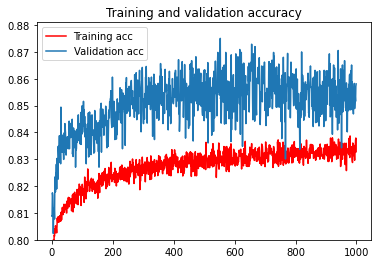

In [145]:
plt.plot(history.history['accuracy'], label='Training acc', color="red")
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim(0.8)
plt.legend()

In [134]:
test_loss, test_acc = model.evaluate(
    test_seq,
    test_labels,
    verbose=2
)

print('\nTest accuracy:', test_acc)

174/174 - 0s - loss: 0.3773 - accuracy: 0.8620 - 118ms/epoch - 681us/step

Test accuracy: 0.8620378971099854


In [135]:
# class_names = ["None", "Left", "Right"]

predictions = model.predict(test_seq)
# print(predictions)

event_pred = np.argmax(tf.nn.softmax(predictions, axis=1), axis=1)
# print(event_pred)

# Rows are "real" labels
# Columns are "predicted" labels
tf.math.confusion_matrix(
    test_labels,
    event_pred
)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[4220,   86,  139],
       [ 279,  271,    0],
       [ 261,    0,  289]], dtype=int32)>

In [ ]:
# TODO: Plot the predictions alongside the actual ranges
# Looks to be 100% correct at least when deciding Left VS Right
# It could be that just the edges of event VS non-event are wrong.

# Should add additional check which uses the output of this neural network itself as a feature.
# eg. The ANN needs to output "Left" or "Right" for 90% (or 50%?) of a sequence 0.1 seconds long.


































